/Users/noppakansirikul/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


accuracy10= 43.94 %
accuracy15= 56.66 %
accuracy20= 66.8 %


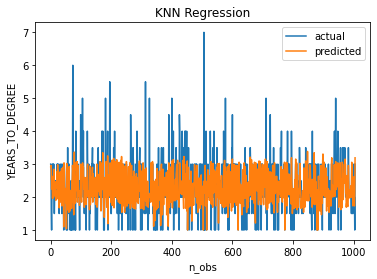

In [1]:
#PYTHON: kNN

import pandas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean

#IMPORT DATAFILE
graddata=pandas.read_csv('Graduate Student Data_MAJ2.csv')
graddata=graddata.dropna()

#RECODE CATEGORICAL VARIABLES
coding_term={'Fall 2016':0,'Fall 2017':1,'Fall 2018':2,'Fall 2019':3,'Fall 2020':4,'Fall 2021':5,
             'Spring 2017':6,'Spring 2018':7,'Spring 2019':8,'Spring 2020':9,'Spring 2021':10}
graddata['TERM']=graddata['TERM'].map(coding_term)

coding_pandemic={'PRE-PANDEMIC':0,'PANDEMIC':1}
graddata['TERM_PANDEMIC']=graddata['TERM_PANDEMIC'].map(coding_pandemic)

coding_race={'Asian':0,'Black or African American':1,'Hispanic/Latino':2,'White':3,'Other':4}
graddata['RACE_ETHNICITY_CAT']=graddata['RACE_ETHNICITY_CAT'].map(coding_race)

coding_visa={'DOMESTIC':0,'INTERNATIONAL':1}
graddata['DOMESTIC_INTERNATIONAL']=graddata['DOMESTIC_INTERNATIONAL'].map(coding_visa)

coding_firstgen={'NOT FIRST GEN':0,'FIRST GEN':1,'UNKNOWN':2}
graddata['FIRST_GEN_CAT']=graddata['FIRST_GEN_CAT'].map(coding_firstgen)

coding_income={'LESS THAN $6K PER YEAR':0,'$6,000 TO $ 11,999':1,'$12,000 TO $ 23,999':2,'$24,000 TO $ 35,999':3,
                 '$36,000 TO $ 47,999':4,'$48,000 TO $ 59,999':5,'$60,000 OR MORE PER YEAR':6,'NO RESPONSE':7}
graddata['INDEP_INCOME']=graddata['INDEP_INCOME'].map(coding_income)

coding_gender={'CIS FEMALE':0,'CIS MALE':1,'NON-BINARY/TRANS':2}
graddata['GENDER']=graddata['GENDER'].map(coding_gender)

coding_sexualorientation={'STRAIGN/HETEROSEXUAL':0,'QUEER':1,'DECLINE TO SAY':2}
graddata['SEXUAL_ORIENTATION']=graddata['SEXUAL_ORIENTATION'].map(coding_sexualorientation)

coding_tuition={'IN-STATE':0,'OUT-OF-STATE':1,'OTHER':2}
graddata['TUITION_TYPE']=graddata['TUITION_TYPE'].map(coding_tuition)

coding_military={'NOT A US MILITARY SERVICE MEMBER':0,'MILITARY SERVICE MEMBER':1}
graddata['MILITARY_STATUS']=graddata['MILITARY_STATUS'].map(coding_military)

coding_acad1={'Good Academic Standing':0,'Probation - First Term':1,'Probation - Second Term':2,'Missing':3}
graddata['ACAD_STAND_01']=graddata['ACAD_STAND_01'].map(coding_acad1)

coding_acad2={'Good Academic Standing':0,'Probation - First Term':1,'Probation - Second Term':2,'Missing':3,
              'Disqualified':4}
graddata['ACAD_STAND_02']=graddata['ACAD_STAND_02'].map(coding_acad2)

coding_activity={"Master's Thesis":0,'Graduate Project':1,'Comprehensive Exams':2,'Unknown':3}
graddata['CULMINATING_ACTIVITY']=graddata['CULMINATING_ACTIVITY'].map(coding_activity)

coding_bachschool={'CSULB':0,'Other CSU':1,'Other College in the US':2,'UC':3,'International':4}
graddata['BACH_SCHOOL']=graddata['BACH_SCHOOL'].map(coding_bachschool)

x=graddata.iloc[:,1:27].values
y=graddata.iloc[:,27].values

#SPLIT DATA INTO 80% TRAINING AND 20% TESTING SETS
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=902487)

#FITTING kNN REGRESSION
reg=KNeighborsRegressor(n_neighbors=26)
kNN_reg=reg.fit(x_train, y_train)

#COMPUTE PREDICTION ACCURACY FOR TESTING DATA
y_pred=kNN_reg.predict(x_test)

ind10=[]
ind15=[]
ind20=[]

for sub1, sub2 in zip(y_pred,y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)

#ACCURACY WITHIN 10%
accuracy10=sum(ind10)/len(ind10)
print("accuracy10=",round(accuracy10*100,2),'%')

#ACCURACY WITHIN 15%
accuracy15=sum(ind15)/len(ind15)
print("accuracy15=",round(accuracy15*100,2),'%')

#ACCURACY WITHIN 20%
accuracy20=sum(ind20)/len(ind20)
print("accuracy20=",round(accuracy20*100,2),'%')

#plotting actual and predicted obsevations vs. observation number
import matplotlib.pyplot as plt
  
n_obs=list(range(0,len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel('n_obs')
plt.ylabel('YEARS_TO_DEGREE')
plt.title('KNN Regression')
plt.legend()
plt.show()